# **HOW DOES THE NEWS REALLY FEEL?**

Here I will be using the news api to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin. I will then go deeper into my analysis and analyze relationships between words, visualize the frequency of words, and even do some recognition analysis. 

# **PREPARATIONS**

## Import Libraries

In [1]:
import os
import numpy as np
import nltk
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
%matplotlib inline

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [3]:
from collections import Counter
from nltk import ngrams

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [84]:
import spacy
from spacy import displacy

In [159]:
# Downlod the stock stopwords from nltk.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nudebeachair./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
# Creat my Lemmatizer instance.
lemmatizer=WordNetLemmatizer()

In [165]:
load_dotenv()

True

In [162]:
api_key=os.getenv("NEWS_API_KEY")

In [163]:
newsapi = NewsApiClient(api_key=api_key)

In [164]:
# Fetch the Bitcoin news articles.
bitcoin_headlines = newsapi.get_everything(q="Bitcoin",language="en", sort_by="relevancy")

In [10]:
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 3763


In [11]:
bitcoin_headlines["articles"][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [12]:
# Fetch the Ethereum news articles.
ethereum_headlines = newsapi.get_everything(q="Ethereum",language="en", sort_by="relevancy")

In [13]:
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 1416


In [14]:
ethereum_headlines["articles"][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

# **COIN SENTIMENT ANALYSIS**

## **Bitcoin Sentiment Analysis**

In [15]:
# Here I will analyze the sentiment scores for my Bitcoin articles by creating a DataFrame.
bitcoin_sentiments=[]
for x in bitcoin_headlines["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        })
        
    except AttributeError:
        pass

In [16]:
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

In [17]:
# Here I will look at a sample of the data.
bitcoin_sentiment_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text
0,-0.6908,2020-09-10,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,2020-09-08,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,2020-08-23,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [18]:
# Reorder DataFrame columns.
cols = ["Date", "Text", "Compound Score", "Positive Score", "Negative Score", "Neutral Score"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

In [19]:
# Look at the reordered sample.
bitcoin_sentiment_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [20]:
# Here I will describe the Bitcoin sentiment dataframe data.
bitcoin_sentiment_df.describe()

,Compound Score,Positive Score,Negative Score,Neutral Score
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.076050,0.008000,0.915950
std,0.320603,0.046397,0.035777,0.046388
min,-0.690800,0.000000,0.000000,0.802000
25%,0.448550,0.083250,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.750600,0.198000,0.160000,1.000000


## **Ethereum Sentiment Analysis**

In [21]:
# Here I will replicate what I did above with the Bitcoin articles but for Ethereum.
ethereum_sentiments=[]
for x in ethereum_headlines["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        })
        
    except AttributeError:
        pass

In [22]:
ethereum_sentiment_df=pd.DataFrame(ethereum_sentiments)

In [23]:
ethereum_sentiment_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text
0,0.7506,2020-09-02,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,2020-09-07,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,2020-09-18,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,2020-08-26,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,2020-08-25,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [24]:
# Here I will look at a sample of the data.
ethereum_sentiment_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text
0,0.7506,2020-09-02,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,2020-09-07,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,2020-09-18,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,2020-08-26,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,2020-08-25,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [25]:
# Reorder DataFrame columns.
cols = ["Date", "Text", "Compound Score", "Positive Score", "Negative Score", "Neutral Score"]
ethereum_sentiment_df = ethereum_sentiment_df[cols]

In [26]:
ethereum_sentiment_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [27]:
# Here I will describe the data in the Ethereum data frame.
ethereum_sentiment_df.describe()

,Compound Score,Positive Score,Negative Score,Neutral Score
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.063062,0.015688,0.921312
std,0.298172,0.070121,0.034763,0.085886
min,-0.267700,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.871000
50%,0.000000,0.053500,0.000000,0.931000
75%,0.401900,0.097250,0.000000,1.000000
max,0.757900,0.209000,0.110000,1.000000


## **Bitcoin Top 16 Analysis**

In [28]:
# Here I will analyze Bitcoin a second time, but match the amount of articles with Ethereum
bitcoin_articles_2=bitcoin_headlines["articles"][0:16]

In [29]:
# We can see that we now have 16 articles and we know they are the most relevant because I sorted by relevancy above.
len(bitcoin_articles_2)

16

In [30]:
# I will then do all the same analysis but using my bitcoin_articles_2 variable for my articles.
bitcoin_sentiments2=[]
for x in bitcoin_articles_2:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments2.append({
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        })
        
    except AttributeError:
        pass

In [31]:
bitcoin_sentiment2_df = pd.DataFrame(bitcoin_sentiments2)

In [32]:
# We already know that the columns wont be in the right order. 
cols = ["Date", "Text", "Compound Score", "Positive Score", "Negative Score", "Neutral Score"]
bitcoin_sentiment2_df = bitcoin_sentiment2_df[cols]

In [33]:
bitcoin_sentiment2_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [34]:
bitcoin_sentiment2_df.describe()

,Compound Score,Positive Score,Negative Score,Neutral Score
count,16.000000,16.000000,16.00,16.000000
mean,0.337687,0.072562,0.01,0.917438
std,0.352251,0.051593,0.04,0.052095
min,-0.690800,0.000000,0.00,0.802000
25%,0.204900,0.047250,0.00,0.910000
50%,0.507000,0.090000,0.00,0.910000
75%,0.507000,0.090000,0.00,0.916750
max,0.750600,0.198000,0.16,1.000000


## Questions:

**1. Which coin had the highest mean positive score?**

Ethereum analysis ended up involving 16 articles and concluding with a mean positive score of 0.063062 while Bitcoin analysis ended up involving 20 articles having a mean positive score of 0.075000. Therefore, we can clearly see that Bitcoin has a higher mean positive score. One could argue that this is because there are 4 more articles to analyze. I took this argument into account and then did a second analysis of Bitcoin but only with 16 articles. Bitcoin still beats Ethereum with a mean positive Score of 0.071250.

**2. Which coin had the highest compound score?**

Since I have two versions of Bitcoin I will give each. When I used all 20 articles my Bitcoin data had a max compound score of 0.750600. Looking at the 16 articles Bitcoin still maxed at 0.750600. Ethereum had a max compound score of 0.757900. This means that Etherum ended up beating both groups of Bitcoin data. In an overall scheme of things, this would technically mean that there's are more positive sentiment overall about Ethereum than Bitcoin. 

**3. Which coin had the highest positive score?**

Again looking at my multiple versions of Bitcoin, my group of 20 articles had a max positive score of 0.198000 and my group of 16 articles had a max positive score of 0.198000 as well. Ethereum ended with a max positive score of  0.20900. From looking at all three of these questions. Ethereum is looking like a better investment.

---

## Data Preperation
For a computer to analyze text it has to be segmented into units, this process is called tokenization. A token is a group of characters that have meaning. It can be words, sentences, or phrases. Sentence segmentation and tokenization are often the first steps in the NLP pipeline. Here I will use NLTK and Python to tokenize my text for each coin.

### Bitcoin Normal Tokenization

In [166]:
# Complete the tokenizer function
def tokenizer(text):
    sw=set(stopwords.words("english"))
    regex=re.compile("[^a-zA-Z ]")
    re_clean=regex.sub(' ',text)
    words=word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(x) for x in words]
    tokens=[x.lower() for x in lem if x.lower() not in sw]
    return tokens

In [37]:
bitcoin_sentiment_df["Tokens"]=[tokenizer(x) for x in bitcoin_sentiment_df["Text"]]

In [38]:
bitcoin_sentiment_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score,Tokens
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagos, london, reuters, four, month, ago, abo..."
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagos, london, reuters, four, month, ago, abo..."


In [39]:
cols=["Date","Text","Tokens","Compound Score","Positive Score","Negative Score", "Neutral Score"]

In [40]:
bitcoin_sentiment_df=bitcoin_sentiment_df[cols]

In [41]:
bitcoin_sentiment_df.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-10,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa...",-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w...",0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000


### Bitcoin Top 16 Tokenization

In [42]:
bitcoin_sentiment2_df["Tokens"]=[tokenizer(x) for x in bitcoin_sentiment2_df["Text"]]

In [43]:
bitcoin_sentiment2_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score,Tokens
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagos, london, reuters, four, month, ago, abo..."
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagos, london, reuters, four, month, ago, abo..."


In [44]:
bitcoin_sentiment2_df=bitcoin_sentiment2_df[cols]

In [45]:
bitcoin_sentiment2_df.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-10,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa...",-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w...",0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000


### Ethereum Tokenization

In [46]:
ethereum_sentiment_df["Tokens"]=[tokenizer(x) for x in ethereum_sentiment_df["Text"]]

In [47]:
ethereum_sentiment_df.head()

,Date,Text,Compound Score,Positive Score,Negative Score,Neutral Score,Tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"[interacted, cryptocurrencies, past, couple, y..."
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[tl, dr, complete, stock, cryptocurrency, inve..."
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000,"[september, min, read, opinions, expressed, en..."
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000,"[new, york, reuters, brooklyn, based, technolo..."


In [48]:
ethereum_sentiment_df=ethereum_sentiment_df[cols]

In [49]:
ethereum_sentiment_df.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-02,If you've interacted with cryptocurrencies in ...,"[interacted, cryptocurrencies, past, couple, y...",0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, dr, complete, stock, cryptocurrency, inve...",0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, read, opinions, expressed, en...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ...",0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklyn, based, technolo...",0.0000,0.000,0.0,1.000


---

## NGrams and Frequency Analysis
NGrams are a way of analyzing word relationships and phrases. Specifically, they are tokens that include multi-word phrases. The N in NGrams actually specifies the number of words in the token grouping or phrase for example a bigram, which is what I will be analyzing here, is assigned an n argument of 2. This means that it will create token phrase relationships of 2 words. We can then analyze the frequency of these two word relationships.

### Bitcoin Normal NGrams

In [168]:
# Here I am declaring a for loop inside of brackets therefore declaring a list of ngrams for every group of tokens.
bitcoin_one_ngrams=[Counter(ngrams(x,n=2)) for x in bitcoin_sentiment_df["Tokens"]]

In [51]:
print(bitcoin_one_ngrams)

[Counter({('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'fool'): 1, ('fool', 'proof'): 1, ('proof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'char'): 1}), Counter({('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('busin

### Bitcoin Top 16 NGrams

In [52]:
# Here again I am declaring a for loop inside of brackets therefore declaring a list of ngrams for every group of tokens for my top 16 Bitcoin.
bitcoin_16_ngrams=[Counter(ngrams(x,n=2)) for x in bitcoin_sentiment2_df["Tokens"]]

In [53]:
print(bitcoin_16_ngrams)

[Counter({('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'fool'): 1, ('fool', 'proof'): 1, ('proof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'char'): 1}), Counter({('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('busin

### Ethereum NGrams

In [169]:
# Here I am declaring a for loop inside of brackets therefore declaring a list of ngrams for every group of tokens for my ethereum articles.
ethereum_ngrams=[Counter(ngrams(x,n=2)) for x in ethereum_sentiment_df["Tokens"]]

In [55]:
print(ethereum_ngrams)

[Counter({('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'char'): 1}), Counter({('tl', 'dr'): 1, ('dr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'price'): 1, ('price', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'char'): 1}), Counter({('september', 'min'): 1, ('min', 'read'): 1, ('read', 'opinions'): 1,

In [57]:
# Here I am declaring a function to analyze the frequency of words in my articles.
def token_count(tokens, N=10):
    fat_list=[]
    flat_list=[]
    for x in tokens:
        fat_list.append(x)
    for sublist in fat_list:
        for item in sublist:
            flat_list.append(item)
    return Counter(flat_list).most_common(N)

### Bitcoin Frequency Analysis

In [59]:
# top 10 words for Bitcoin.
token_count(bitcoin_sentiment_df["Tokens"])

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('day', 14)]

### Bitcoin Top 16 Frequency Analysis

In [61]:
# top 10 words for Bitcoin, top 16 articles.
token_count(bitcoin_sentiment2_df["Tokens"])

[('bitcoin', 31),
 ('satoshi', 20),
 ('nakaboto', 20),
 ('char', 16),
 ('robot', 10),
 ('colleague', 10),
 ('writes', 10),
 ('every', 10),
 ('fucking', 10),
 ('day', 10)]

### Ethereum Frequency Analysis

In [58]:
# top 10 words for Ethereum
token_count(ethereum_sentiment_df["Tokens"])

[('char', 16),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6),
 ('images', 5),
 ('price', 4),
 ('ha', 4),
 ('getty', 4),
 ('used', 3),
 ('september', 3)]

## Word Clouds
It is harder to just look at numbers when analyzing data. People like graphs and charts. Visualizations make data fun and this is why word clouds were created. Here I will generate word clouds for each coin to summarize the news I have found.

In [170]:
# Here I am declaring a function that will generate word clouds of any token data it is fed.
def wc_generator(tokens):
    super_string=''
    for x in tokens:
        big_string=' '.join(x)
        super_string=super_string + big_string
    wc=WordCloud().generate(super_string)
    plt.axis("off")
    return plt.imshow(wc)

### Bitcoin Word Cloud

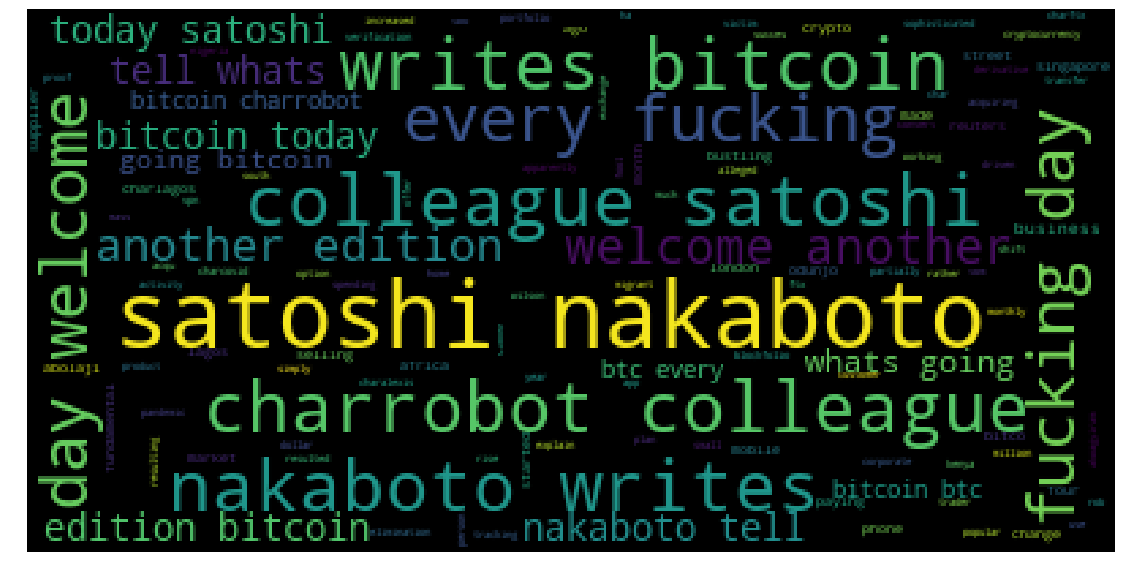

In [171]:
# Here I am calling my generator function to create the Bitcoin word cloud. 
wc_generator(bitcoin_sentiment_df["Tokens"])

### Bitcoin Top 16 Word Cloud

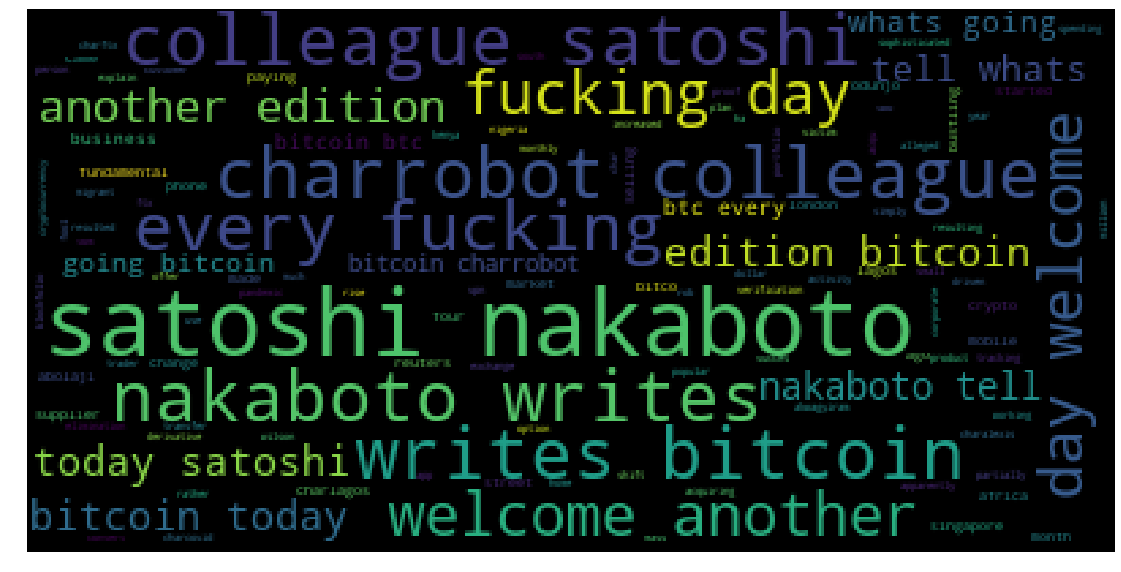

In [172]:
# Here I am calling the generator function to create the Bitcoin Top 16 word cloud.
wc_generator(bitcoin_sentiment2_df["Tokens"])

### Ethereum Word Cloud

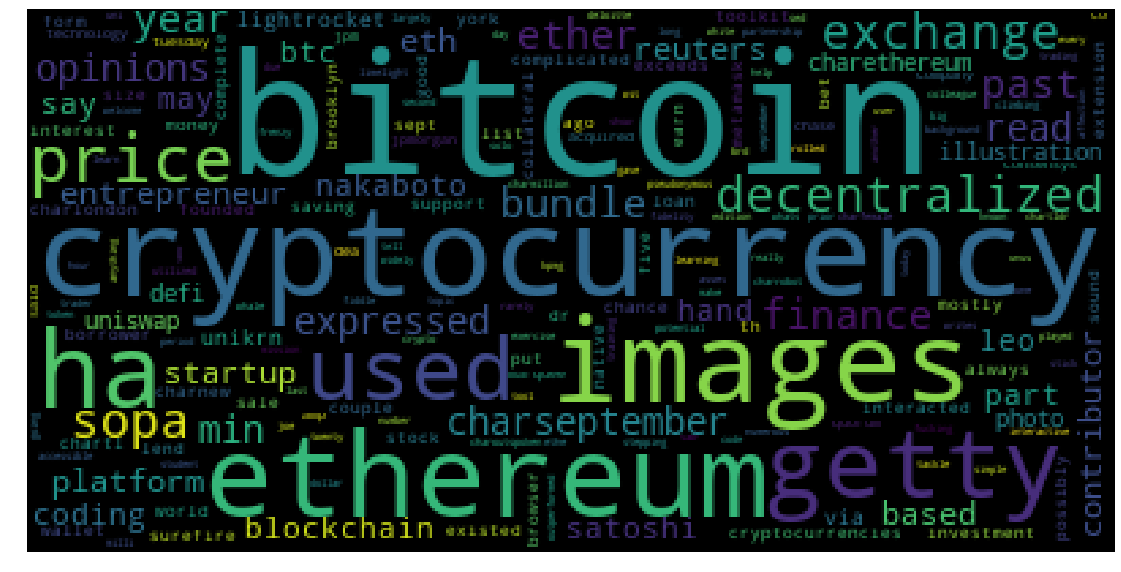

In [173]:
# Here I am calling the generator function to create the Ethereum word cloud.
wc_generator(ethereum_sentiment_df["Tokens"])

## Named Entity Recognition

The idea of Named Entity Recognition is to give us another level of analysis. Named Entity Recognition extracts things called entities, named entities which include proper nouns and other specific types of nouns from a text. It also gives labels for those nouns and the text associated with them. Here I will be using spaCy for my NER work.

In [108]:
# Load the spaCy model.
nlp = spacy.load('en_core_web_sm')

In [109]:
# Here I create a function that will concatenate all articles together and then tokenize them with spaCy processing.
def spacy_token_generator(text):
    super_dirty_string=''
    for x in text:
        big_dirty_string=''.join(x)
        super_dirty_string=super_dirty_string + big_dirty_string
    tokens=nlp(super_dirty_string)
    return tokens

In [100]:
# Generate spaCy processed tokens for all Bitcoin Articles.
bitcoin_spacy=spacy_token_generator(bitcoin_sentiment_df["Text"])

In [101]:
# Display the tokens all together.
bitcoin_spacy

Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson
* Monthly crypto transfers to and from Africa rise 55% in a year
* Much of the activity in Nigeria, South Africa and Kenya
* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street marke

In [102]:
# Generate the spaCy processed tokens for the top 16 Bitcoin articles.
bitcoin_spacy2=spacy_token_generator(bitcoin_sentiment2_df["Text"])

In [103]:
# Display the tokens all together.
bitcoin_spacy2

Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson
* Monthly crypto transfers to and from Africa rise 55% in a year
* Much of the activity in Nigeria, South Africa and Kenya
* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street marke

### Bitcoin NER

In [157]:
# Render a visualization for the Name Entitity Recognition for all Bitcoin articles.
bitcoin_spacy.user_data["title"]="Bitcoin NER"
displacy.render(bitcoin_spacy,style="ent")

In [174]:
# Render a visualization for the Name Entitity Recognition for the Top 16 Bitcoin articles.
bitcoin_spacy2.user_data["title"]="Bitcoin Top 16 NER"
displacy.render(bitcoin_spacy2,style="ent")

In [104]:
# Present a list of the entities, the text with the label for all Bitcoin articles.
for ent in bitcoin_spacy.ents:
    print(ent.text,ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

In [106]:
# Present a list of the entities, the text with the label for the Top 16 Bitcoin articles.
for ent in bitcoin_spacy2.ents:
    print(ent.text,ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

---

### Ethereum NER

In [112]:
# Generate the spaCy processed tokens for the Ethereum articles.
ethereum_spacy=spacy_token_generator(ethereum_sentiment_df["Text"])

In [113]:
# Display the tokens.
ethereum_spacy

If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.
The world of finance has always been complicated, and now th… [+2225 chars]September
18, 2020
6 min read
Opinions expressed by Entrepreneur contributors are their own.
Founded over five years ago, the Ethereum platform and its native ether (ETH) have existed mostly in t… [+6239 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, t

In [176]:
# Render a visualization for the Name Entitity Recognition for the Ethereum articles.
ethereum_spacy.user_data["title"]="Ethereum NER"
displacy.render(ethereum_spacy,style="ent")

In [175]:
# Present a list of the entities, the text with the label for the Ethereum articles.
for ent in ethereum_spacy.ents:
    print(ent.text,ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Reuters ORG
about 20% PERCENT
YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
chars]The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
16, 2020 DATE
6 min QUANTITY
the past few months DATE
wo